In [1]:
import numpy as np
from genetic_alogorithm_pmf_api import Problem

In [ ]:
# Set seed for reproducibility
np.random.seed(42)

# 1. Create problem - Harbor Bridge Design
problem = Problem(
    variables=['x1', 'x2', 'x3', 'x4'],
    bounds=[(10, 70), (10, 400), (2, 8), (350, 750)]
)

# 2. Contractor (O1 - Reduce cost, minimize)
# Preference: -100 + 240/x
# Function range: 0.5186 (best) to 1.7192 (worst)
problem.add_stakeholder(
    name="Contractor",
    weight=0.2,
    objective="(0.4 / x2**0.8) + (0.002 * x1**1.1) + (0.05 * x3**1.2) + (0.0008 * x4**1.05)",
    preference_points=([0.5186, 1.0695, 1.7192], [100, 40, 0])
)

# 3. Port (O2 - Ensure vertical clearance, maximize)
# Preference: 100 / (1 + e^(-0.514 * (x - 45))) - SIGMOID CURVE
# Using 9 points to capture smooth S-shape with inflection point at x1=45
problem.add_stakeholder(
    name="Port",
    weight=0.2,
    objective="x1",
    preference_points=([10, 25, 35, 40, 45, 50, 55, 60, 70], [0, 0, 0.58, 7.11, 50, 92.89, 99.42, 99.96, 100])
)

# 4. TxDOT (O4 - Maximise traffic capacity, maximize)
# Preference: (100/sqrt(6))*(sqrt(x-2))
# At x=2 (worst): 0
# At x=5 (mid): ~71
# At x=8 (best): 100
problem.add_stakeholder(
    name="TxDOT",
    weight=0.2,
    objective="x3",
    preference_points=([2, 4, 6, 10], [0, 5, 10, 100])
)

# 5. TxCEQ (O5 - Protect environment, minimize)
# Preference: 0.258*sqrt(200000 - x)
# Function range: 53230 (best) to 182019 (worst)
problem.add_stakeholder(
    name="TxCEQ",
    weight=0.2,
    objective="(500000 / x2**1.2) + (5000 * x3**1.1) + (50 * x4**1.15)",
    preference_points=([53230, 101064, 182019], [100, 72.47, 0])
)

# 6. Locals (O6 - Protect people, minimize)
# Preference: 22.36*sqrt(20-x)
# Function range: 0.6633 (best) to 2.4920 (worst)
problem.add_stakeholder(
    name="Locals",
    weight=0.2,
    objective="0.2 * x3**1.1 + 0.0005 * x4**1.05",
    preference_points=([0.6633, 1.5516, 2.4920], [100, 52.04, 0])
)

# 7. Add constraint: Horizontal clearance minimum (O3)
problem.add_constraint("x2 >= 35")
problem.add_constraint("x2 <= x4")


Run GA with minmax
The type of aggregation is set to minmax
Generation   Best score   Mean             Max stall    Diversity    Number of non-feasible results
0            8.8601       33000016.2589    0            0.004        33          
1            8.2842       28000010.3436    0            0.067        28          
2            7.6342       11000009.3177    0            0.212        11          
3            7.4969       4000009.0698     0            0.216        4           
4            7.438        3000009.0063     0            0.219        3           
5            7.4134       3000008.3716     0            0.228        3           
6            7.4134       7000007.9533     1            0.231        7           
7            7.4134       5000007.9668     2            0.23         5           
8            7.4134       4000007.8931     3            0.234        4           
9            7.4134       1000008.0309     4            0.23         1           
10           7.4134

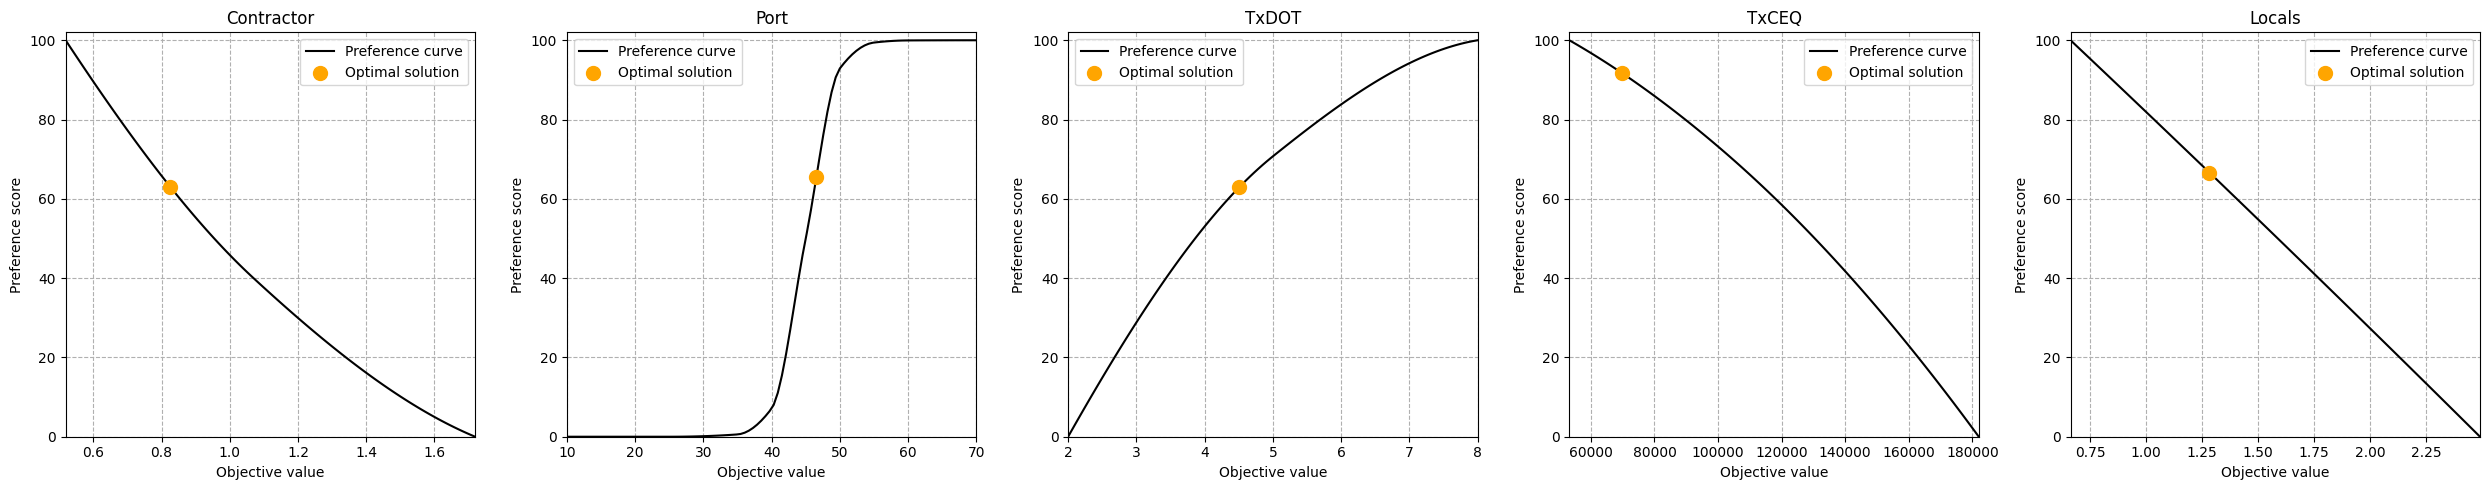

In [3]:
# 8. Solve with minmax paradigm
paradigm = 'minmax'

print(f'\n{"="*60}')
print(f'Run GA with {paradigm}')
print(f'{"="*60}')

# Set seed immediately before GA run
np.random.seed(42)

result = problem.solve(paradigm=paradigm)

# 9. Print results
print(f'\nOptimal result:')
print(f'  x1 (Vertical clearance) = {result.variables["x1"]:.2f} meters')
print(f'  x2 (Distance pillars) = {result.variables["x2"]:.2f} meters')
print(f'  x3 (number of lanes) = {result.variables["x3"]:.2f} lanes')
print(f'  x4 (Span of bridge) = {result.variables["x4"]:.2f} kg')

print(f'\nScore: {result.score:.4f}')

print(f'\nStakeholder results:')
for name, data in result.stakeholders.items():
    print(f'  {name}:')
    print(f'    Objective value: {data["objective_value"]:.4f}')
    print(f'    Preference score: {data["preference_score"]:.2f}')

# 10. Plot results for minmax
print(f'\n{"="*60}')
print('Plotting results for minmax paradigm...')
print(f'{"="*60}\n')

result.plot()

In [4]:
# # 11. Solve with tetra paradigm
# paradigm = 'tetra'

# print(f'\n{"="*60}')
# print(f'Run GA with {paradigm}')
# print(f'{"="*60}')

# # Set seed immediately before GA run
# np.random.seed(42)

# result = problem.solve(paradigm=paradigm)

# # 12. Print results
# print(f'\nOptimal result:')
# print(f'  x1 (Vertical clearance) = {result.variables["x1"]:.2f} meters')
# print(f'  x2 (Horizontal clearance) = {result.variables["x2"]:.2f} meters')
# print(f'  x3 (Traffic capacity) = {result.variables["x3"]:.2f} lanes')
# print(f'  x4 (CO2 emissions) = {result.variables["x4"]:.2f} kg')

# print(f'\nScore: {result.score:.4f}')

# print(f'\nStakeholder results:')
# for name, data in result.stakeholders.items():
#     print(f'  {name}:')
#     print(f'    Objective value: {data["objective_value"]:.4f}')
#     print(f'    Preference score: {data["preference_score"]:.2f}')

# # 13. Plot results for tetra
# print(f'\n{"="*60}')
# print('Plotting results for tetra paradigm...')
# print(f'{"="*60}\n')

# result.plot()